In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import integrate
from sympy.plotting import plot as symplot
from numpy import random


In [91]:
upper_t = 10
BUMP = 3
relative_depression = 10
t = Symbol("t")

Define each payoff element as the integral of a function. 

| Payoff      | Cortex want | Cortex abstain
| ----------- | ----------- | -----------
| Neocortex Do      | A       |   B
| Neocortex Abstain   | C        |   D

/var/folders/89/z6q1j9bs0bx83tmg_4d6slh80000gn/T/ipykernel_66180/436496291.py:7: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t_vals = linspace(0, upper_t, 100)


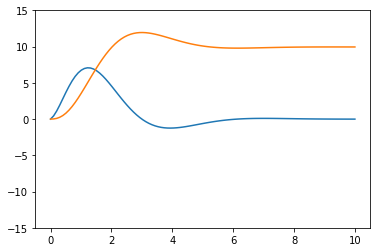

In [132]:
# A functionality

# todo:make depression bump lower and manage peak vs depression and readjustment time..
 
a = -t*(sin(t-BUMP))*(1/exp(t-BUMP)) 
lam_a = lambdify(t, a, modules=['numpy'])
t_vals = linspace(0, upper_t, 100)
y_vals = lam_a(t_vals)


A = integrate(a, (t, 0, t))
lam_A = lambdify(t, A, modules=['numpy'])
A_vals = lam_A(t_vals)

plt.ylim([-15, 15])

plt.plot(t_vals, y_vals)
plt.plot(t_vals, A_vals)

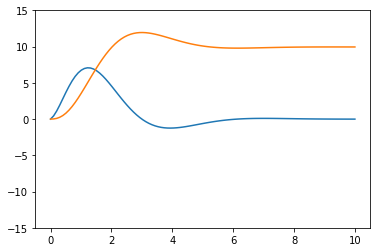

In [133]:
# B functionality
b = -t*(sin(t-BUMP))*(1/exp(t-BUMP)) # Change this function to have a smaller spike and shallower depression. 
lam_b = lambdify(t, b, modules=['numpy'])
y_vals = lam_b(t_vals)


B = integrate(b, (t, 0, t))
lam_B = lambdify(t, B, modules=['numpy'])
B_vals = lam_B(t_vals)

plt.ylim([-15, 15])

plt.plot(t_vals, y_vals)
plt.plot(t_vals, B_vals)

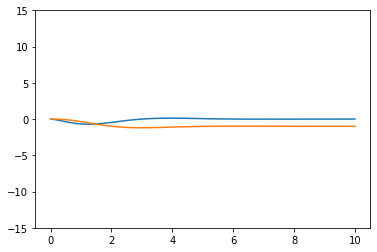

In [134]:
# B functionality
# abstaining has a slight dip and then a movement back to homeostasis this dip is a function of the past choice ect....
c = t*(sin(t-BUMP))*(1/exp(t-BUMP))/relative_depression # Change this function to have a smaller spike and shallower depression. 
lam_c = lambdify(t, c, modules=['numpy'])
y_vals = lam_c(t_vals)


C = integrate(c, (t, 0, t))
lam_C = lambdify(t, C, modules=['numpy'])
C_vals = lam_C(t_vals)
plt.ylim([-15, 15])


plt.plot(t_vals, y_vals)
plt.plot(t_vals, C_vals)


[ 0.26 -0.31  0.2  -0.05 -0.5  -0.22  0.    0.14  0.39  0.35  0.04  0.27
  0.43  0.39  0.49 -0.5  -0.01  0.24 -0.11 -0.44  0.13  0.05  0.44  0.32
 -0.05 -0.3   0.28  0.36  0.32  0.42  0.13  0.21 -0.46  0.34  0.25  0.12
  0.01  0.32 -0.29  0.39 -0.36  0.22 -0.03 -0.01 -0.19  0.28 -0.23  0.46
  0.17  0.27  0.16  0.13  0.27 -0.26 -0.36  0.31  0.41  0.03  0.44 -0.25
 -0.23 -0.16  0.33 -0.22 -0.43  0.31 -0.32 -0.05 -0.41  0.11  0.1   0.04
 -0.26  0.17 -0.01 -0.45  0.44 -0.22  0.1   0.27 -0.33 -0.15  0.14 -0.1
 -0.29  0.28  0.05  0.4   0.45  0.09 -0.27  0.   -0.15 -0.34  0.39 -0.03
  0.02 -0.06 -0.09  0.34]


(-15.0, 15.0)

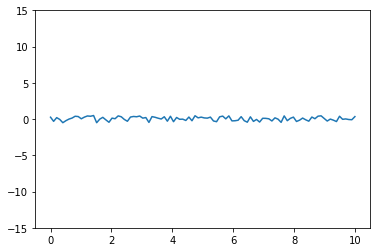

In [135]:
# D functionality. This is the healthly baseline with normal fluctuations that are chaotic and random simulating external events...
BASELINE_variation = 100
d=(random.randint(BASELINE_variation, size=len(t_vals))-50)/BASELINE_variation
print(d)
plt.plot(t_vals,d)
plt.ylim([-15, 15])



In [ ]:
# analyse what is ESS for different t max values...
# need to multiple each state in the future by a rediuced amount as this and this must be weighed up with the reduction in dopamine aka the crash... 
# 

# need a way to see how the crashand peak effects the ess...

# Then play the repeting game and see how cycles can be established and / or broken...


